In [80]:
import json
import csv 
import pandas as pd

In [81]:
df = pd.read_csv("owid_covid_data.csv")
print(df.columns.tolist())

['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_

In [82]:
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN                  37.746   
1             NaN           NaN                  37.746   
2             NaN           NaN                  37.746   
3             NaN           NaN                  37.746   
4             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.511   
1                         0.5            64.83                    0.511   
2                         0.5            64.83                    0.511   
3                         0.5            64.83                    0.511   
4                         0.5            64.83                    0.511   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [83]:
to_drop = ['continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million','icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million']
df.drop(to_drop, inplace=True, axis=1)

In [84]:
df = df.dropna()
df.head()

iso_code  reproduction_rate
34      AFG               1.51
35      AFG               1.51
36      AFG               1.52
37      AFG               1.51
38      AFG               1.51

In [85]:
GBR = df[df["iso_code"] == "GBR"]
GBR = GBR.iloc[2:, :]
USA = df[df["iso_code"] == "USA"]
GBR = GBR.reset_index()
USA = USA.reset_index()

KOR = df[df["iso_code"] == "KOR"]
KOR = KOR.iloc[13:, :]
KOR = KOR.reset_index()
KOR.describe()


index  reproduction_rate
count     710.000000         710.000000
mean   136358.500000           1.054887
std       205.103632           0.314311
min    136004.000000           0.200000
25%    136181.250000           0.900000
50%    136358.500000           1.030000
75%    136535.750000           1.180000
max    136713.000000           3.090000

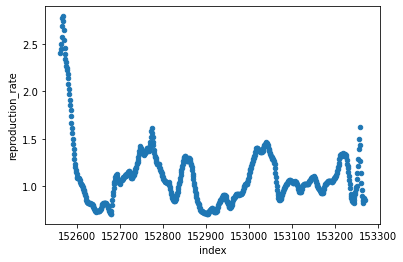

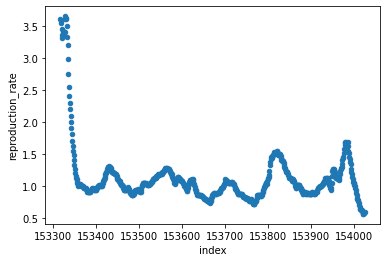

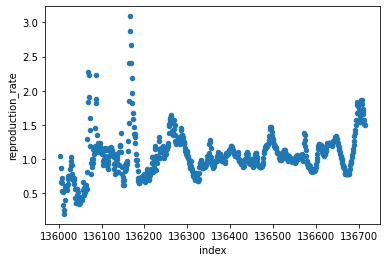

In [86]:
GBRplot = GBR.plot.scatter(y='reproduction_rate', x='index')
USAplot = USA.plot.scatter(y='reproduction_rate', x='index')
KORplot = KOR.plot.scatter(y='reproduction_rate', x='index')


In [87]:
GBR = GBR.drop('index',axis=1)
USA = USA.drop('index',axis=1)
KOR = KOR.drop('index',axis=1)

USA = USA.rename(columns={"reproduction_rate":"USA_RR"})
GBR = GBR.rename(columns={"reproduction_rate":"GBR_RR"})
KOR = KOR.rename(columns={"reproduction_rate":"KOR_RR"})

USA_GBR = pd.concat([USA, GBR], axis=1, join="inner")
USA_GBR.drop(['iso_code'], inplace=True, axis=1)

USA_KOR = pd.concat([USA, KOR], axis=1, join="inner")
USA_KOR.drop(['iso_code'], inplace=True, axis=1)

USA_KOR.head()

USA_RR  KOR_RR
0    3.62    1.05
1    3.56    0.87
2    3.58    0.66
3    3.46    0.72
4    3.32    0.65

In [88]:
USA_KOR.describe()

USA_RR      KOR_RR
count  710.000000  710.000000
mean     1.119239    1.054887
std      0.455721    0.314311
min      0.560000    0.200000
25%      0.900000    0.900000
50%      1.020000    1.030000
75%      1.160000    1.180000
max      3.660000    3.090000

In [89]:
USA_GBR.to_csv('us_gbr_effective_reproductive_rate.csv',index=False)
USA_KOR.to_csv('us_kor_effective_reproductive_rate.csv',index=False)

In [78]:
## MI calculated in MCalcPart1b.m
# over all MI - 0.2033 bits
# over all 

# US GBR 
#First 150 0.6877 bits
#Middle 150  0.0885 bits 


# US KOR 
#First 150 0.1482 bits
#Middle 150  0.0889 bits

#for Entropy calculation (pdfs)
#USA_GBR['diff'] = abs(USA_GBR['USA_RR'] - USA_GBR['GBR_RR'])
#USA_KOR['diff'] = abs(USA_KOR['USA_RR'] - USA_KOR['KOR_RR'])
#USA_KOR.head()


#USAGBR_USAKOR_DIFF = pd.concat([USA_GBR['diff'], USA_KOR['diff']], axis=1, join="inner")
#USAGBR_USAKOR_DIFF = USAGBR_USAKOR_DIFF.T
#USAGBR_USAKOR_DIFF.head()

0     1     2     3     4     5     6     7     8     9    ...   700  \
diff  1.22  1.11  1.08  0.89  0.63  0.59  0.64  0.66  0.78  0.83  ...  0.52   
diff  2.57  2.69  2.92  2.74  2.67  2.83  2.91  3.07  3.17  3.17  ...  1.10   

       701   702  703   704   705  706   707   708   709  
diff  0.42  0.34  0.3  0.25  0.29  0.3  0.31  0.28  0.27  
diff  1.24  1.25  1.2  1.16  1.15  1.1  1.01  0.94  0.91  

[2 rows x 710 columns]